# Ventas de videojuegos por región y por tipo de consola

## Objetivo

Analizar la base de datos de fuente abierta sobre ventas internacionales de videojuegos explorando características y patrones que ayuden a explicar el éxito o fracaso de un videojuego en sus diferentes plataformas. 

## Cargar las librerías necesarias

In [98]:
#Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


## Base de datos

In [99]:
#Cargar la base de datos
df=pd.read_csv('/datasets/games.csv')

## Exploración inicial del marco de datos

Aplicar los principales comandos de exploración de datos para ofrecer una imagen inicial que podamos explorar con mayor detenimiento más adelante.

In [100]:
#Muestra de la tabla
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [101]:
df.info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [102]:
print(df.isna().sum())

print('Número de filas duplicadas:')
df.duplicated().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
Número de filas duplicadas:


0

Observaciones iniciales:

    * Valores ausentes en al menos 5 columnas.
    * La columna `User_score` debería ser de tipo flotante o entero.
    * Tenemos al menos una venta de 0.0 dólares en cada región.
    * No hay filas con duplicados exactos.
    * Los cuartiles terceros y los valores máximos en cada una de las regiones están separadas por valores muy grandes. 


## Preparación de los datos.

Profundizar más en las características de la base de datos para corregir errores y preparar los datos para su correcto análisis.

### Cambiar nombres de las columas a sólo minúsculas

In [103]:
#Cambiar los nombres de las columnas a minúscuas.
df.columns=df.columns.str.lower()

En la sección superior se **cambiaron los nombres de las columnas** de mayúsculas y minúsculas a sólo minúsculas para facilitar el acceso a las mismas.

### Exploración de valores únicos en columnas `name`, `genre`, y `platform`.

In [104]:
#Buscar valores repetidos o mal escritos.
print('Strings únicos de columna genre:',df.genre.unique())
print()
print('Strings únicos de columna platform:', df.platform.unique())
print()
#Número de valores únicos columna `name`
print('Número de elementos únicos en columna `name`:',df.name.nunique())

Strings únicos de columna genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Strings únicos de columna platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Número de elementos únicos en columna `name`: 11559


**Los valores únicos** parecen correctos y sin faltas tipográficas. 

### Columna `name`.

A pesar de que hay alrededor de 167 mil filas en nuetro marco de datos, sólo tenemos 11559 valores únicos en la columna `name` y ya que no tenemos **duplicados exactos** podemos suponer que se trata de juegos que salieron para más de una plataforma.    

In [105]:
#Muestra de un valor duplicado de la columna `name`.
print(df.query('name.duplicated()').head(1))
df.query('name == "Grand Theft Auto V"')

                  name platform  year_of_release   genre  na_sales  eu_sales  \
23  Grand Theft Auto V     X360           2013.0  Action      9.66      5.14   

    jp_sales  other_sales  critic_score user_score rating  
23      0.06         1.41          97.0        8.1      M  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


In [106]:
#Duplicados de los duplicados de la columna `name`. 
df.loc[df['name'].duplicated()].duplicated().sum()

0

Se observa que algunos juegos con el mismo nombre pertenecen a plataformas distintas, además, vemos que no existen filas repetidas de los nombres de la columna `name` que se repiten, por lo que nuestra suposición previa parece correcta.

### Columna `genre`

Tratar los 2 valores ausentes de la columna `genre`. 

In [107]:
#Valores vacíos de la columna genre.
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Es imposible saber a qué juego se refieren estas dos filas, además, podemos ver que también incluyen a los dos nombres ausentes de la columna `name`. Mas, al ser una parte muy pequeña de datos, eliminarlos no representa una périda significativa.

In [108]:
#Eliminar las filas con valores ausentes.
df.drop(index=[659,142], inplace=True)

### Columna `critic_score`.

Los datos ausentes de la columnas de puntaje podrían deberse a que sólo se realizaban a partir de cierto año o sólo para ciertas plataformas o sólo en ciertas regiones. Exploremos cada una de las opciones.

In [109]:
#Probar que las evaluaciones sólo se hacían en determinadas regiones.
df.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Vemos que hay ingresos en al menos una de las 4 columnas en las que se componen las regiones y con valores que van desde muy altos (ejemplo, 29.08) hasta valores muy bajos (ejemplo, 0.01). Se rechaza la suposición.

In [110]:
#Los valores ausentes dependen del género.
print('Número de géneros totales:',df['genre'].nunique())
print()
print('Número de géneros con valores ausentes:',df.query('user_score.isna()')['genre'].nunique())


Número de géneros totales: 12

Número de géneros con valores ausentes: 12


Los dos número coinciden por lo que podemos suponer que los géneros no fueron un punto de división de los datos. 

In [111]:
#Años en los que hubo críticas a los juegos.
df.groupby(['year_of_release'])['critic_score'].agg(['mean', 'median'])

,mean,median
year_of_release,,
1980.0,NaN,NaN
1981.0,NaN,NaN
1982.0,NaN,NaN
1983.0,NaN,NaN
1984.0,NaN,NaN
1985.0,59.000000,59.0
1986.0,NaN,NaN
1987.0,NaN,NaN
1988.0,64.000000,64.0


In [112]:
#Valores ausentes de critic score después de 1995
df.query('year_of_release >= 1996')['critic_score'].isna().sum()

7760

In [113]:
#Número de puntajes antes de 1996
df.query('year_of_release < 1996')['critic_score'].value_counts()

64.0    1
85.0    1
69.0    1
59.0    1
Name: critic_score, dtype: int64

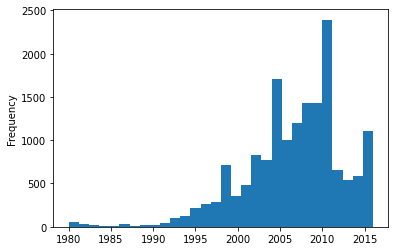

In [114]:
#Juegos a lo largo de los años
df['year_of_release'].plot(kind='hist', bins=30);

**Conclusión intermedia:** Vemos que la mayoría de los datos sin críticas aparecen a partir de 1996 y de manera ininterrumpida hasta la actualidad; antes de 1996 sólo hubo 4 evaluaciones. Sin embargo, dado que agrupamos, esto no indica que no existan valores ausentes después de 1996, y en efecto, tenemos 7760. Éstos podrían aparecer por el simple hecho de que no se evalúan todos los videojuegos que salen al mercado.

También, es evidente de que no habrá muchas críticas sobre videojuegos si no hay videojuegos. Así, no es sorprendente que las criticas se hagan a partir de 1996 cuando el primer gran incremento en el número de videojuegos aparece después de 1995.

En resumen, no podemos rellenarla a través de `name` porque son demasiados valores únicos; los valores faltantes no parecen pertenecer a ningún `genre` en específico; `platform` tendrá valores ausentes para las plataformas más antiguas; `year_of_release` tiene valores ausentes y no podemos estimar el puntaje de un juego sólo porque salío antes o después. Por lo anterior, tendremos que continuar el análisis con los valores vacíos en la columna `critic_score`.

### Columna `user_score`.

In [115]:
#Observar la columna `user_score` para determinar por qué aparece como tipo object.
print(df.user_score.unique())
#Filtrar la tabla por valor "tbd" en la columna `user_score`.
df.query('user_score=="tbd"').head()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Se observa que existen valores "tbd" que impiden la correción adecuada de la columna.

Para **convertir la columnas`user_score` al tipo correcto** es necesario tratar los valores "tbd" (to be determine), sin embargo, ya que su existencia parece distribuida aleatoreamente en todo el marco de datos (pues no atiende a un tipo de género en específico, a una región, popularidad o a una plataforma) no hay forma de determinar las razones de su existencia e incluso si así fuese, no habría forma de proyectar un puntaje para estos juegos.

Por lo tanto, parece correcto que se elimine el parámetro "tbd" y se sustituya por un valor nulo. Obsérvese, no por un cero, ya que incrementaríamos sintéticamente las calificaciones con valor ese valor. Después, debemos realizar un análisis similar al aplicado en la columna anterior. 

In [116]:
#Remplazar valor de "tbd" con un valor nulo.
df['user_score']=df['user_score'].replace("tbd", None)
#Cambiar los tipos de datos de la columna `user_score`
df['user_score']=df['user_score'].astype('float')

In [117]:
#Probar que las evauaciones de los usuarios dependen de las regiones o de un mínimo en las ventas. 
df.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Los valores ausentes están en todas las regiones y se presentan tanto en ventas elevadas y bajas. Se rechaza la susposición de que su ausencia se debaa una región en específico o a un número bajo de ventas. 

In [118]:
#Probar si los valores ausentes en ùser_score` dependen del género.

#Numero de géneros únicos.
print(df.genre.nunique())
#Número de géneros con valores ausentes únicos.
df.query('user_score.isna()').genre.nunique()


12


12

Parece ser que los valores ausentes de la columna `user_score` están repartidos a lo largo de la columna `genre`y que por lo tanto no atiende a un género en específico. 

In [119]:
#Años en los que hubo críticas a los juegos.
df.groupby(['year_of_release'])['user_score'].agg(['mean', 'median'])

,mean,median
year_of_release,,
1980.0,NaN,NaN
1981.0,NaN,NaN
1982.0,NaN,NaN
1983.0,NaN,NaN
1984.0,NaN,NaN
1985.0,5.800000,5.80
1986.0,NaN,NaN
1987.0,NaN,NaN
1988.0,2.200000,2.20


Similar al caso anterior, aunque las calificaciones se hagan más constantes a partir de cieta fecha, no nos indica nada sobre cómo determinar su puntaje sólo con base en el tiempo. El hecho de que un juego salga después de otro no garantiza que sea mejor, incluso aunque salga para una plataforma más avanzada, pues se suelen considerar estas diferencias de potencia al momento de evaluar un videojuego. 

En esta columna tampoco podemos completar nuestras tablas con base en alguna otra columna ya que no parecen depender de la región, las ventas, el género, el año ni la plataforma. Por ello, tendremos que proceder sin rellenar los valores ausentes. 

### Columna `year_of_release`. 

In [120]:
print("Porcentaje de datos no ausentes", (1-(df.year_of_release.isna().sum()/df.shape[0]))*100)

Porcentaje de datos no ausentes 98.39047448094298


In [121]:
df.shape[0]

16713

El número de valores ausentes en esta tabla sólo representa el 1.61% del total del los datos, por lo que se decide trabajar con el otro 98.39%.

In [122]:
for i in df.query('year_of_release.isna()').name:
    try:
        if float(re.search("\d+", i).group()) > 1970:
            print(re.search("\d+", i).group())
        else:
            print("") 
    except:
        print("")

2004
2004

2006













2003

















2009












2002















2003






2003



2013





2005




2003




















































2005


































































2011










2006
































2008




2007








2008






Nótese que algunos videojuegos incluyen un año en su nombre, por lo que podemos suponer que se trata del año de lanzamiento con acaso algunos meses de diferencia. No obstante, incluirlos sólo aportaría 0.101% a nuestros datos.

Observaciones adicionales: 

   * Los valores de cero en distintas regiones se deben a que no se vendió ese videojuego en esa región y no a una ausencia de datos.
   * EL cuartil número tres está demasiado alejado del valor máximo en el caso de `na_sales` e incluso para `jp_sales` lo que podría indicar que tenemos muchos valores menores a 1 y sólo algunos videojuegos que fueron muy exitosos.

### Calcular columna de ingresos totales

In [123]:
#Calcular ingresos totales de todas las regiones por juego.
df['net_sales']=df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
#
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,net_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


## Análisis de los datos

Se procede a hacer un análisis más detallado de las características de nuestros datos para poder cumplir con nuestro objetivo.

count    16444.000000
mean      2006.485466
std          5.876465
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

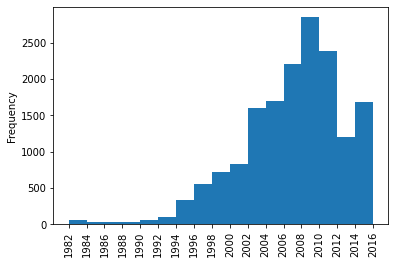

In [124]:
# Número de videojuegos lanzados a lo largo de los años.
df['year_of_release'].plot(kind='hist', bins=range(1982,2018,2), xticks=range(1982,2018,2), rot=90);
df.year_of_release.describe()

La industria de los videdojuegos es relativamente reciente. En la primera, e incluso en la segunda década desde su aparición, no vemos tantos juegos como los acumulados a partir del año 2002. 

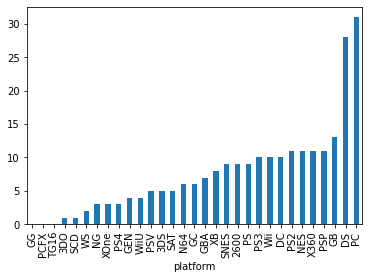

In [125]:
#Plataformas más longevas.
(df.groupby('platform')['year_of_release'].max() - df.groupby('platform')['year_of_release'].min()).sort_values().plot(kind='bar');

Vemos que la plataforma más longeva es la PC. Es de suponerse ya que no se especifíca un tipo de computadora personal por lo que éstas pueden ir evolucionando y aumentando su capacidad sin perder el calificativo de PC. No así con nuestras demás consolas. No obstante, debemos explorar qué explica que DS sea también tan longeva. Es de suponerse que se trata de la consola Nintendo DS que no es tán vieja. 

Obsérvese que el rango donde caen la mayoría de nuestras plataformas es ente los 5 a los 12 años. Debemos ser cuidadosos en no suponer que una plataforma tiene menos tiempo porque fue menos exitosa. En realidad, podría tratarse de una plataforma joven. Sin embargo, por ahora concentremos nuestro interés en las plataformas que han dejado más ingresos.

In [126]:
#Obtener las plataformas más recientes. 
df.groupby('platform')['year_of_release'].min().sort_values(ascending=False).head(12)

platform
XOne    2013.0
PS4     2013.0
WiiU    2012.0
3DS     2011.0
PSV     2011.0
PS3     2006.0
Wii     2006.0
X360    2005.0
PSP     2004.0
GC      2001.0
GBA     2000.0
PS2     2000.0
Name: year_of_release, dtype: float64

Podemos distinguir que las plataformas de última generación aparecieron alrededor del año 2012. Y sus antecesoras aparecieron alrededor del año 2005. Eso significa que las nuevas plataformas aparecen alrededor de cada 6 años (con un máximo de 8 años para el X360-XOne). La única consola cuya antecesora no aparece es el la del nintendo DS. Exploremos a qué se debe. 

In [127]:
df.query('year_of_release == 1985 & platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,net_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Vemos que el error puede venir del nombre del videojuego que coincide con el nombre de la plataforma (o hasta puede ser una coincidencia), pero es claro que esta fila no pertenece a la plataforma DS, ya que hay demasiados años de diferencia entre 1985 y el 2004.

In [128]:
#Modificar la fila con la plataforma incorrecta.
df.iloc[15955,1]='undetermined'

In [129]:
#Comprobar que funcionó
df.query('year_of_release == 1985 & platform == "undetermined"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,net_sales
15957,Strongest Tokyo University Shogi DS,undetermined,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


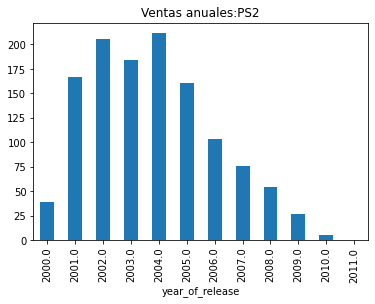

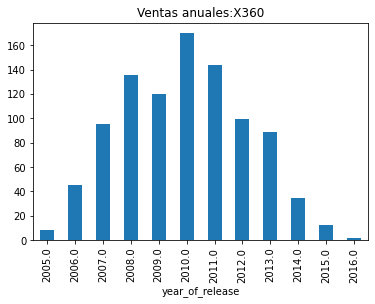

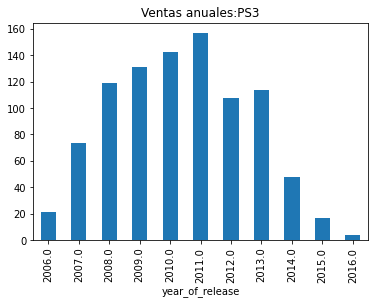

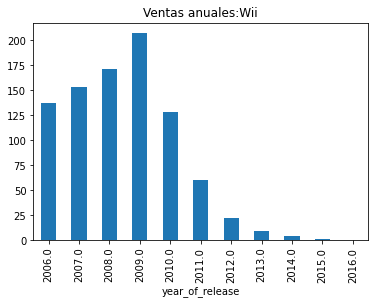

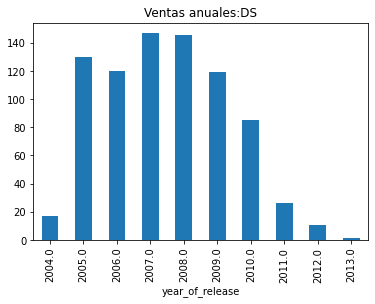

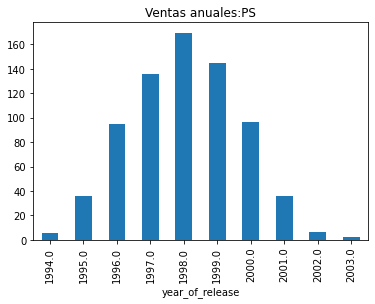

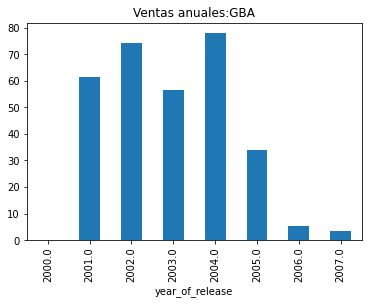

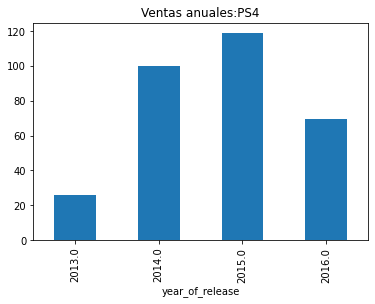

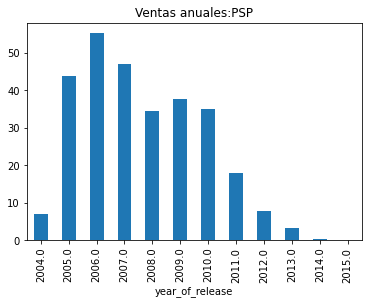

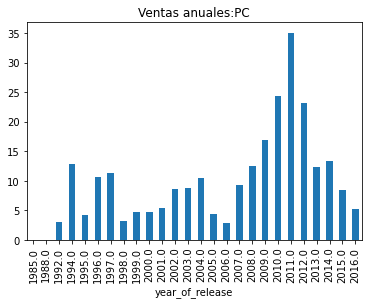

In [130]:
#Ingreos de las 10 mejores plataformas a lo largo de los años.
plastas= df.groupby(['platform'])['net_sales'].sum().sort_values(ascending=False).head(10).to_dict().keys()

for i in plastas:
    df.loc[df['platform'] == i].groupby(['year_of_release'])['net_sales'].sum().plot(kind='bar', title=f'Ventas anuales:{i}')
    plt.show()
    
    

Vemos que la mayoría de las plataformas más exitosas han durado alrededor de 10 años, con excepción de GBA y PS4. Pues aquélla sólo duró 7 años y ésta es demasiado reciente. Además, las plataformas tienen un tiempo de vida no mayor a 11 años. 

Tambien, hay que notar que las plataformas más exitosas (con excepción de la PS4) son de "penúltima generación". No hay que subestimar su peso: han tenido tiempo suficiente, desde su ascenso hasta su ocaso, para acumular ingresos a lo largo de los años. Las ventas de las plataformas de última generación deben modelarse a partir de sus antecesoras más recientes. Es decir, el **periodo de tiempo** a analizar debe estar como mínimo a partir del año 2004.

No obstante, dado que vamos a realizar una estimación, es conveniente no alejarse demasiado en el tiempo y considerar a las plataformas más recientes y que tengan mayor potencial de crecimiento.

Consideremos a las plataformas de "última generación" como aquellas que salieron después del año 2010. Podemos analizar la distribución de sus ingresos a lo largo de los años como hicimos con las plataformas más rentables hasta el momento. Se entiende que aquellas tendrán el potencial del crecimiento más grande ya que son jóvenes en el mercado y sus predecesoras han tenido grandes ventas.

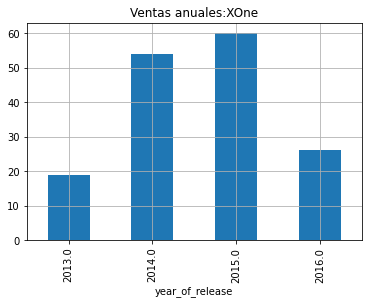

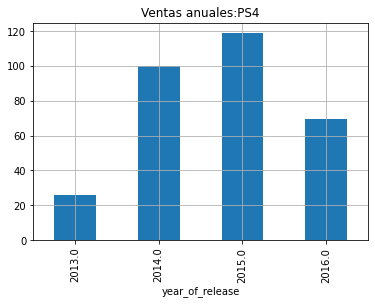

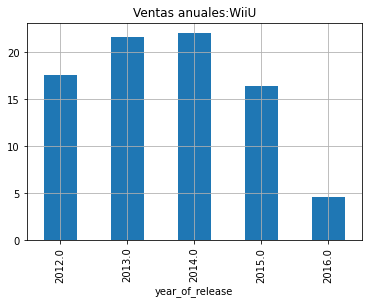

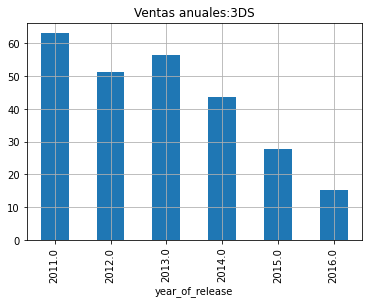

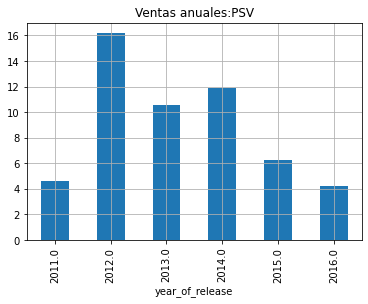

In [131]:
brand_new=['XOne','PS4','WiiU','3DS','PSV']

for i in brand_new:
    df.loc[df['platform'] == i].groupby(['year_of_release'])['net_sales'].sum().plot(kind='bar', title=f'Ventas anuales:{i}', grid=True)
    plt.show()

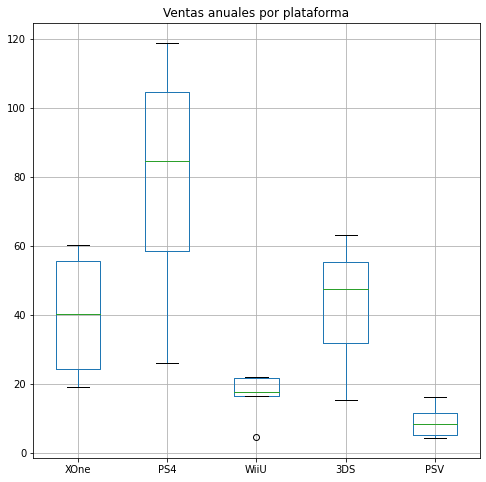

In [148]:
#Distribución de las ventas anuales por plataforma
(pd.pivot_table(df, columns='platform', index='year_of_release', values='net_sales', aggfunc='sum')
 [['XOne','PS4','WiiU','3DS','PSV']]
.plot(kind='box', figsize=(8,8), grid=True, title='Ventas anuales por plataforma'));

Conclusión intermedia: La presencia de la PS4 en el mercado es indudable, alcanzando los casi 120 millones de dólares en el año 2015. La segunda plataforma con un mayor potencial de crecimiento es la consola XOne. Las demás consolas alzanzaron el máximo de sus ventas entre los años 2012-2014. Las ventas totales de la consola 3DS superan a las del XOne, pero no olvidemos que éste tiene 4 años de antiguedad contra los 6 años del 3DS, que dicho sea de paso, ha visto sus ventas reducirse considerablemente.

Por lo anterior, escogemos la PS4 como la plataforma más prometedora, sin embargo, tenemos muchos más datos de su predecesora, que, de igual forma, tuvo grandes ingresos, incluso desde la plataforma PS. 

Correlación: 0.404


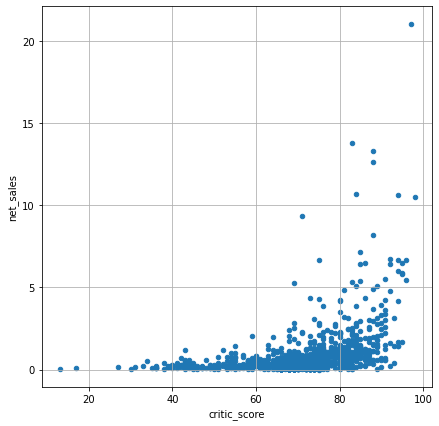

In [42]:
#Gráfico de dispersión ventas netas vs critic_score.
df.query('platform == "PS3"').plot(kind='scatter', y='net_sales', x='critic_score', figsize=(7,7), grid=True);
print('Correlación:',df.query('platform == "PS3"')['net_sales'].corr(df.query('platform == "PS3"')['critic_score']).round(3))

Correlación: 0.049


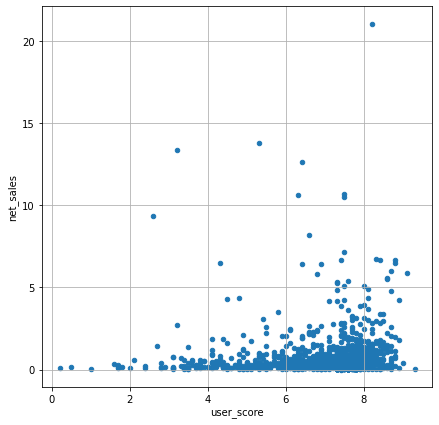

In [43]:
#
df.query('platform == "PS3"').plot(kind='scatter', y='net_sales', x='user_score', figsize=(7,7), grid=True);
print('Correlación:',df.query('platform == "PS3"')['net_sales'].corr(df.query('platform == "PS3"')['user_score']).round(3))

La correlación es más intensa entre `net_sales` y `critic_score` que entre `net_sales` y `user_score`. Es apropiado calcular la misma correlación pero entre estos videojuegos pero que también salieron para otras plataformas. 

Correlación en otras consolas: 0.301
Correlación para la PS3: 0.364


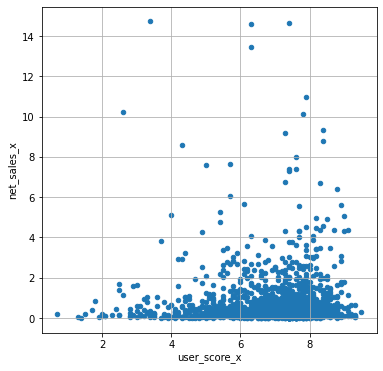

In [44]:
#Comparar el comportamiento entre PS3 con los mismos juegos pero de las demás plataformas.

#Marco de datos de los nombres de los juegos repetidos, al menos una vez, para la consola PS3.
repetidos_ps3=df[df['name'].duplicated()].query('platform == "PS3"')

#Juegos repetidos para la consola ps3 en otras consolas.
(df.merge(repetidos_ps3, how='inner', on='name')
 #escogemos todas aquellas plataformas que no sean PS3
 .query('platform_x != "PS3"')
 #Graficamos el resultado
 .plot(kind='scatter', x='user_score_x', y='net_sales_x', figsize=(6,6), grid=True));

#Cálculo de la correlación entre sus ventas y las calificaciones de los críticos.
print('Correlación en otras consolas:',df.merge(repetidos_ps3, how='inner', on='name')
 .query('platform_x != "PS3"')['net_sales_x'].corr(df.merge(repetidos_ps3, how='inner', on='name')
 .query('platform_x != "PS3"')['critic_score_x']).round(3))
#Cálculo de la correlación para los juegos de PS3 que también se pueden econtrar en otras consolas.
print('Correlación para la PS3:',df.merge(repetidos_ps3, how='inner', on='name')
 .query('platform_x == "PS3"')['net_sales_x'].corr(df.merge(repetidos_ps3, how='inner', on='name')
 .query('platform_x == "PS3"')['critic_score_x']).round(3))

Como era de esperarse, hay una correlación más intensa entre las ventas de los videjuegos para la consola PS3 que para el conjunto de las demás consolas, con una diferencia de .063. Ello podría indicar que las ventas son incluso mayores para los juegos que son exclusivos de la consola PS3. 

No obstante, a pesar de que se esperaba que las correlaciones sí fueran positivas, ninguna correlación es lo suficientemente grande como para asegurar una fuerte correlación lineal entre las variables. Sólo hace falta observar cómo hay demasiadas ventas con valores reducidos a pesar de tener calificaciones altas.


## Perfil de usuario por región

Plataformas con más ventas por región, a partir del año 2011:

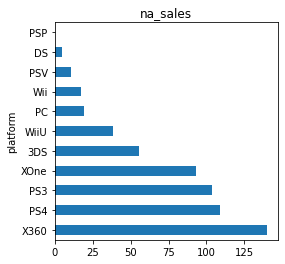

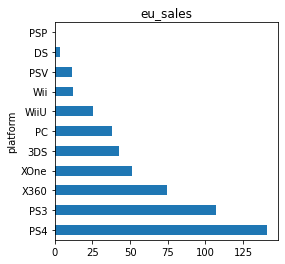

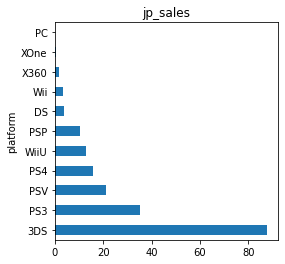

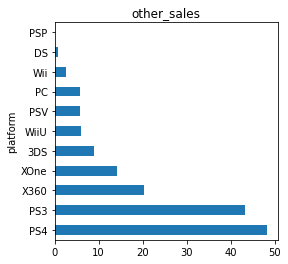

In [167]:
#Construir gráficas de pastel para cada región mostrando las plataformas con más ventas.
regiones=['na_sales','eu_sales','jp_sales','other_sales']

for i in regiones:
    df.query('year_of_release > 2011').groupby('platform')[i].sum().sort_values(ascending=False).plot(title=i,kind='barh', figsize=(4,4))
    plt.show()
    

Vemos que más del 75% del mercado es dominado en cada región por menos de 4 plataformas. En norteamérica dominan el x360, PS4, PS3 y XOne dominando poco más del 75%. En la Unión Europea dominan la PS4, PS3, X360 y XOne con poco menos del 75%. Las 3 mejores plataformas en Japón dominan aún más, principalmente por la consola 3DS, que domina poco menos del 45%. Aquí rige el nintendo 3DS, el PS3 y el PSV pero no hay espacio para el X360. Nótese que las tres plataformas dominantes en todas las regiones, con excepción de Japón, son la PS3, PS4 y el X360.

Plataformas más exitosas por género, a partir de 2011.

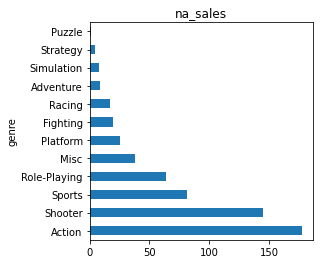

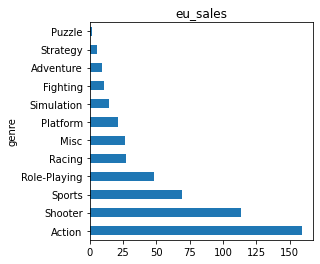

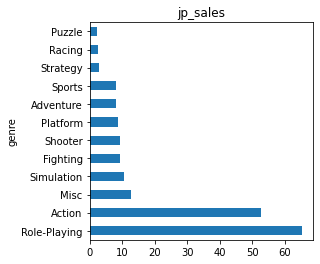

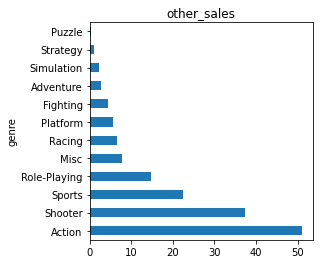

In [174]:
for i in regiones:
    df.query('year_of_release > 2011').groupby('genre')[i].sum().sort_values(ascending=False).plot(title=i,kind='barh', figsize=(4,4))
    plt.show()    

El comportamiento de las regiones es muy similar en todas las regiones (exceptuando Japón, nuevamente) donde 5 géneros dominan el mercado con más del 75% de las ventas: Action, Shooter, Sports, y Role-Playing. Sólo en Japón, el género de Role-Playing supera por mucho los demás, pero aún ahí, lidera en conjunto con el género Action.

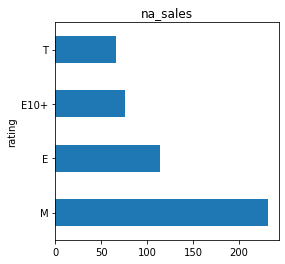

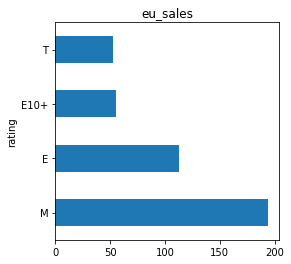

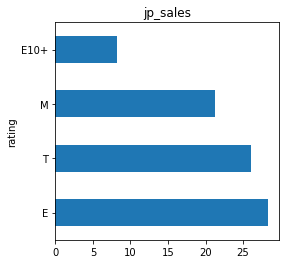

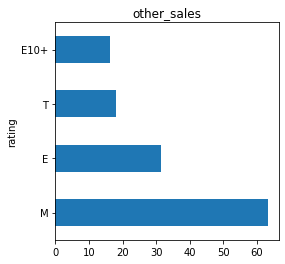

In [175]:
for i in regiones:
    df.query('year_of_release > 2011').groupby('rating')[i].sum().sort_values(ascending=False).plot(title=i, kind='barh', figsize=(4,4))
    plt.show()

Nuévamente, el comportamiento es muy similar para todas las regiones exceptuando a Japón. En este caso, sin embargo, son sólo 4 categorías las que dominan casi todo el mercado: M (siendo la número uno en cada región), E, T y E10+. Sólo en Japón E es superior a T y a M. 

## Pruebas de hipótesis.

### Las medias de los puntajes de los usuarios de XOne y PC son las mismas.

Nuestra primera hipótesis a demostrar es si las calificaciones promedio de los usuarios de las plataformas PC y XOne son las mismas. Para ello utilizaremos una prueba ttest que ofrece la opción de considerar como idénticas las varianzas de nuestros datos. Así, establecemos que:

Hipótesis Nula, H0: Las medias de las calificaciones de los usuarios de XOne y PC son las mismas.

Hipótesis Alternativa, H1: Las medias de las calificaciones de los usuarios de XOne y PC no son las mismas.

Valor alpha de 0.05

Antes de compararlas debemos comparar si sus varianzas pueden considerarse idénticas.

In [48]:
#Seccion de datos a comparar.

cal_xone= df.query('year_of_release > 2004 & platform == "XOne"')['user_score']
cal_xone.var()

1.5790796056745993

In [49]:
#Sección de datos de PC

cal_pc=df.query('year_of_release > 2004 & platform == "PC"')['user_score']
cal_pc.var()

1.9020168878166466

Las varianzas son curiosamente bastante similares.

In [50]:
alpha=0.05

one_vs_pc=st.ttest_ind(cal_xone, cal_pc, equal_var=True)

print(one_vs_pc.pvalue)

if one_vs_pc.pvalue > alpha:
    print('No se rechaza la hipótesis nula')
else:
    print('Se rechaza la hipótesis nula')

0.01066181055045655
Se rechaza la hipótesis nula


Existe suficiente evidencia estadística como para rechazar la hipótesis nula y tomar la alternativa: las medias de las calificaciones de los usuarios de Xone y PC no son las mismas. 

### Las medias de las calificaciones de los usuarios del género Action y Sports son las mismas.

Utilizaremos la misma prueba estadpistica que antes, un valor alpha idéntico y la metodología previa. En este caso, nuestras hipótessis quedan como:

H0: Las medias de las calificaciones de los usuarios del género Action y Sports son las mismas.

H1: Las medias de las calificaciones de los usuarios del género de Action y Sports no son las mismas.

In [51]:
#Calificaciones del género Action después de 2004
cal_action= df.query('year_of_release > 2004 & genre == "Action"')['user_score']
cal_action.var()

1.255854459221635

In [52]:
#Calificaciones del género Sports después del 2004
cal_sports= df.query('year_of_release > 2004 & genre == "Sports"')['user_score']
cal_sports.var()

1.9045381514026973

Las varianzas son similares. 

In [53]:
action_vs_sports=st.ttest_ind(cal_action, cal_sports, equal_var=True)

print('P-value:', action_vs_sports.pvalue)

if action_vs_sports.pvalue > alpha:
    print('No se rechaza la hipótesis nula')
else:
    print('Se rechaza la hipótesis nula')

P-value: 4.9654249129392975e-09
Se rechaza la hipótesis nula


En este caso, nuestra prueba de hipótesis nula también es rechazada, es decir, no podemos considerar que las medias de las calificaiciones de los usuarios sean las mismas. 

## Conclusión

Se revisaron y rellenaron las columnas con mayor número de valores ausentes. Vimos que las plataformas tienen un periodo de vida  de alrededor de 10 años que no necesariamente termina cuando aparecen consolas más modernas. Se observa que las plataformas más exitosas han tenido sus versiones mejoradas y han liderado el mercado. Las plataformas más recientes no tienen tantos ingresos como sus antecesoras, no debido a una falta de éxito, sino a que han tenido poco tiempo para acumular ingresos. 

La correlación entre las ventas y las calificaciones de los usuarios es, como se esperaba, positiva, pero débil.

De todas las plataformas, la línea de PS ha liderado el mercado a nivel global. La pruba está en que la PS4, a pesar de ser tan reciente, está dentro de las 10 con mayores ingresos y en que la PS3 está dentro de las tres mejores plataformas sin importar la región.

La plataforma más longeva, gracias a que es también la más genérica, es la PC, y es de esperarse que sus calificiones, al ser más numerosas tengan una distribución con una media diferente a una plataforma tan reciente como es el XOne. Tenemos el mismo resultado entre las calificaciones de los usuarios para el género Action y el género Sports.